In [ ]:
#Importing important libraries for our project
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
# Dataset downloading
# https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression
data = pd.read_csv("/content/train.csv")
data.head( )

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
  # Converting our dataset to Tensor
  tensor_data = tf.constant(data)
  tensor_data = tf.cast(tensor_data,tf.float32)
  print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
#Randomly shuffling our Tensors for
tensor_data=tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[1.71000e+02 6.39975e+05 8.60663e+05 5.00000e+00 6.01990e+04 1.00000e+00
  1.00000e+01 1.20000e+01 1.85000e+02 1.18000e+02 1.37000e+02 5.58253e+05]
 [8.40000e+01 6.95797e+05 8.72137e+05 7.00000e+00 8.19410e+04 3.00000e+00
  1.00000e+01 1.10000e+01 1.44000e+02 6.00000e+01 1.29000e+02 4.98148e+05]
 [2.37000e+02 6.00873e+05 7.18675e+05 5.00000e+00 9.12040e+04 5.00000e+00
  5.00000e+00 1.50000e+01 1.83000e+02 7.60000e+01 1.33000e+02 2.96829e+05]
 [3.88000e+02 5.10402e+05 7.21256e+05 3.00000e+00 5.90890e+04 3.00000e+00
  1.00000e+00 1.00000e+01 1.71000e+02 1.02000e+02 1.30000e+02 3.79725e+05]
 [9.82000e+02 5.07558e+05 8.83156e+05 2.00000e+00 1.01069e+05 1.00000e+00
  1.00000e+01 1.30000e+01 1.55000e+02 7.70000e+01 1.24000e+02 3.41328e+05]], shape=(5, 12), dtype=float32)


In [ ]:
# Selecting only the columns that we need except the last one
x = tensor_data[:,3:-1]
print(x[0:5])

tf.Tensor(
[[5.00000e+00 6.01990e+04 1.00000e+00 1.00000e+01 1.20000e+01 1.85000e+02
  1.18000e+02 1.37000e+02]
 [7.00000e+00 8.19410e+04 3.00000e+00 1.00000e+01 1.10000e+01 1.44000e+02
  6.00000e+01 1.29000e+02]
 [5.00000e+00 9.12040e+04 5.00000e+00 5.00000e+00 1.50000e+01 1.83000e+02
  7.60000e+01 1.33000e+02]
 [3.00000e+00 5.90890e+04 3.00000e+00 1.00000e+00 1.00000e+01 1.71000e+02
  1.02000e+02 1.30000e+02]
 [2.00000e+00 1.01069e+05 1.00000e+00 1.00000e+01 1.30000e+01 1.55000e+02
  7.70000e+01 1.24000e+02]], shape=(5, 8), dtype=float32)


In [ ]:
# Taking our last column as Y
y=tensor_data[:,-1]
y=tf.expand_dims(y,axis=-1)
print(y[0:5])


tf.Tensor(
[[558253.]
 [498148.]
 [296829.]
 [379725.]
 [341328.]], shape=(5, 1), dtype=float32)


In [ ]:
# Normalizing our values for passing it to our model
normalizer=Normalization()
x_normalized=tf.constant(data)
normalizer.adapt(x_normalized)

normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

In [ ]:
print(x.shape)

(1000, 8)


In [ ]:
# Making ratios for our splitting
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
DATASET_SIZE=len(x)

In [ ]:
# X and Y based on our Train ratio i.e 80%; 0.8
X_train=x[:int(DATASET_SIZE*TRAIN_RATIO)]
Y_train=y[:int(DATASET_SIZE*TRAIN_RATIO)]


In [ ]:
# Slicing in training dataset and shuffling for better training
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,Y_train))
train_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Selecting our values for Validity data
X_val=x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
Y_val=y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]


In [ ]:
#Slicing and shuffling like above
val_dataset=tf.data.Dataset.from_tensor_slices((X_val,Y_val))
val_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Shaping our X_test and Y_test
X_test=x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
Y_test=y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
X_test.shape

TensorShape([100, 8])

In [ ]:
# Slicing and Shuffling ourtest_dataset
test_dataset=tf.data.Dataset.from_tensor_slices((X_test,Y_test))
test_dataset=train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Normalizing our values for passing it to our model
normalizer=Normalization()

normalizer.adapt(x)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.25549763, -1.3754662 , -1.4178832 ,  1.5614393 ,  0.16820416,
         0.93922204,  1.6313721 ,  1.595244  ],
       [ 1.4194931 , -0.6292386 ,  0.00855888,  1.5614393 , -0.28034028,
        -1.1874738 , -1.1969752 ,  1.2151637 ],
       [ 0.25549763, -0.31131446,  1.4350009 , -0.20970328,  1.5138375 ,
         0.83548075, -0.4167415 ,  1.4052038 ],
       [-0.9084978 , -1.4135635 ,  0.00855888, -1.6266173 , -0.7288847 ,
         0.2130332 ,  0.85113835,  1.2626737 ],
       [-1.4904956 ,  0.02727146, -1.4178832 ,  1.5614393 ,  0.6167486 ,
        -0.61689687, -0.36797687,  0.9776135 ]], dtype=float32)>

In [ ]:
# Making our model using Sequential and Dense layers
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1),

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
________________

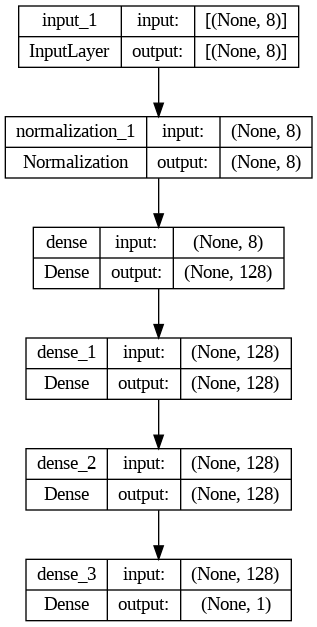

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True)

In [ ]:
# Compiling our model
model.compile(optimizer=Adam(learning_rate=1),loss=MeanAbsoluteError(),metrics=RootMeanSquaredError())

In [ ]:
# Fitting our model on our training dataset
history = model.fit(train_dataset,validation_data=val_dataset,epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 18ms/step - loss: 37239.6953 - root_mean_squared_error: 46511.7539 - val_loss: 33011.1992 - val_root_mean_squared_error: 42445.5195
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 47809.8984 - root_mean_squared_error: 59799.5938 - val_loss: 69429.0859 - val_root_mean_squared_error: 81577.2656
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 43599.6914 - root_mean_squared_error: 54320.0977 - val_loss: 42710.6719 - val_root_mean_squared_error: 52522.4336
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 40063.2734 - root_mean_squared_error: 50373.8281 - val_loss: 45726.4219 - val_root_mean_squared_error: 56476.0312
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 39200.7188 - root_mean_squared_error: 49443.7656 - val_loss: 41255.3789 - val_root_mean_squared_error: 51610.0703
Epoch 6/100
25/25 [==============================] - 0s 4ms/step

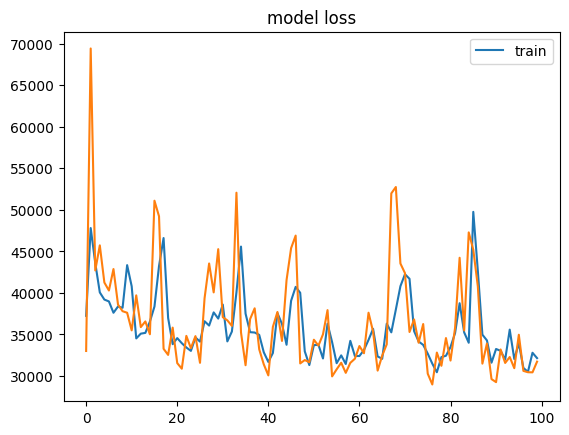

In [ ]:
# Plotting our Model losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.legend(['train'])
plt.show()

In [ ]:
history.history


{'loss': [244698.046875,
  72553.84375,
  56504.4609375,
  52677.48046875,
  55266.31640625,
  45278.4453125,
  46537.984375,
  44749.4453125,
  43860.84375,
  47759.10546875,
  43147.57421875,
  44759.81640625,
  47656.921875,
  46978.46484375,
  42335.2265625,
  51278.71484375,
  49428.953125,
  41629.89453125,
  36974.05078125,
  36896.99609375,
  40147.37109375,
  37592.3515625,
  38898.39453125,
  38419.4609375,
  38023.48828125,
  46214.91015625,
  48779.9296875,
  37755.3984375,
  39430.33203125,
  37710.05078125,
  39142.69140625,
  39245.296875,
  37596.62109375,
  36928.9609375,
  35499.0859375,
  37547.23046875,
  40156.55078125,
  36737.86328125,
  35488.77734375,
  37911.1015625,
  38807.05078125,
  35526.953125,
  35315.2734375,
  35776.7890625,
  38852.46484375,
  33532.87890625,
  34856.40234375,
  37328.28515625,
  36089.578125,
  34773.9375,
  34546.0234375,
  35483.89453125,
  36873.5625,
  40256.51953125,
  40590.015625,
  39081.8984375,
  37042.6015625,
  37210.289

In [ ]:
# Evaluating our model
model.evaluate(X_val,Y_val)

4/4 [==============================] - 0s 3ms/step - loss: 41420.0508 - root_mean_squared_error: 49750.7656


[41420.05078125, 49750.765625]

In [ ]:
# Predicting our specific value
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 36ms/step


array([[448050.97]], dtype=float32)